<a href="https://colab.research.google.com/github/sergiolopezzl/DIMD/blob/main/Tarea_CNN_IA_SergioLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flower Classification SERGIO DANIEL LOPEZ VARGAS


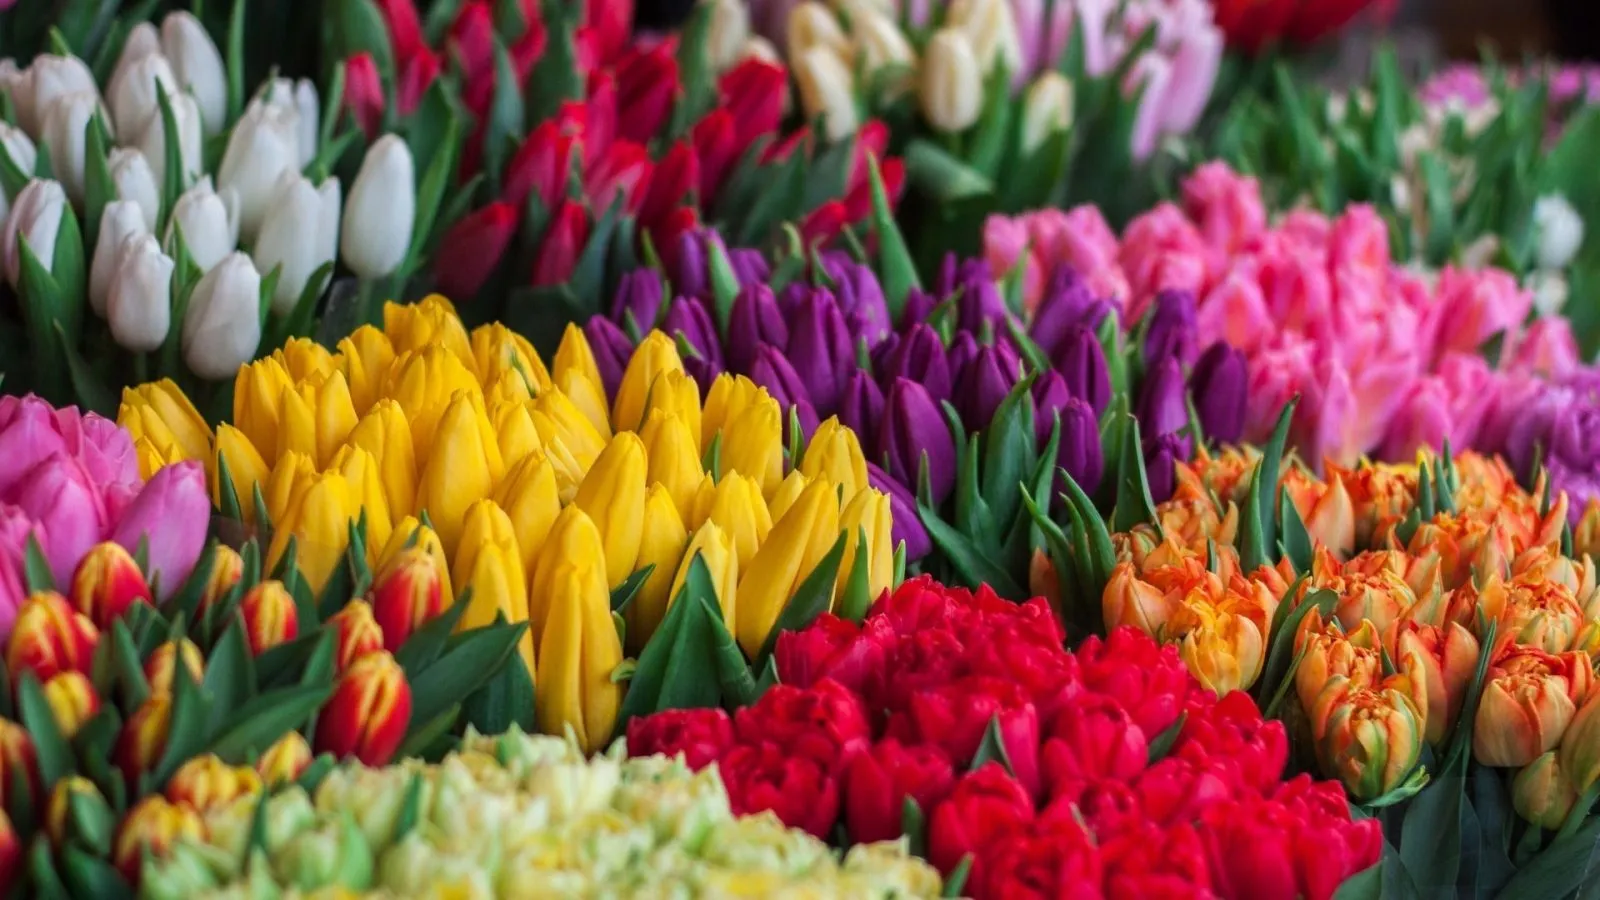

# Use VGG16 to Extract features with VGG16

## Compare optimizers:

SGD(lr=0.0001, momentum=0.9)
Adam (learning_rate = 0.0001)
rmsprop

loss='categorical_crossentropy'

## ImageDataGenerator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

rescale -> convert the pixels in range [0,255] to range [0,1]

zoom -> [0.5, 1.5]

rotation -> 40

brightness -> (0.1, 0.9)

channel_shift -> 150.0

horizontal/vertical_flip -> True

width_shift_range=0.3, fill_mode='nearest'

## Compare it with Sequential model below

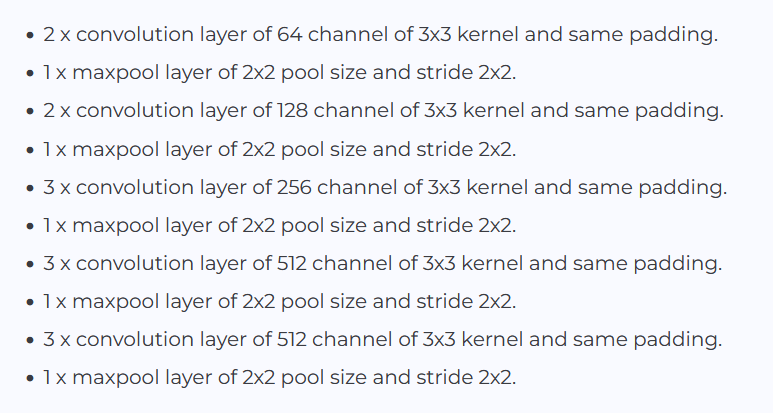

# Fully Connected


GlobalMaxPooling2D

Dropout(0.5)

Dense Softmax layer


## Visualize validation vs training

In [ ]:
!gdown 1fAMA1xnDDTZO1Xc5s3kdfuTEgDVSn7qk
!gdown 1xe7o34YULxmZvr5QaMt9x0sqHJqE3-Tp

In [ ]:
flower_list = ['sunflower', 'tulip', 'rose']

# Test with the downloaded file

rose_test.jpeg

# Save a model in a pickle file

# TAREA SERGIO DANIEL LOPEZ VARGAS

In [ ]:
import tensorflow as tf
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.losses import categorical_crossentropy
import pickle
from PIL import Image
import numpy as np
# Ruta a los datos
data_dir = '/content/flowers.zip'
train_data_dir = '/content/extracted_data'

# Extraer los datos del archivo ZIP
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall(train_data_dir)

# Ruta a tus carpetas de datos de entrenamiento
#train_data_dir = 'ruta/a/tus/datos/de/entrenamiento'
validation_data_dir = '/content'


In [ ]:
# Hiperparámetros
learning_rate = 0.0001
batch_size = 32
epochs = 20


In [ ]:
# Generador de datos de entrenamiento
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    zoom_range=[0.5, 1.5],
    rotation_range=40,
    brightness_range=(0.1, 0.9),
    channel_shift_range=150.0,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.3,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)
224
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)


In [ ]:
# Modelo VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_vgg16 = Sequential()
model_vgg16.add(base_model)
model_vgg16.add(GlobalMaxPooling2D())
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(3, activation='softmax'))


In [ ]:
# Compilar y entrenar el modelo VGG16
model_vgg16.compile(optimizer=SGD(lr=learning_rate, momentum=0.9), loss=categorical_crossentropy, metrics=['accuracy'])
model_vgg16.fit(train_generator, validation_data=validation_generator, epochs=epochs)


In [ ]:
# Modelo secuencial personalizado
model_custom = Sequential()

# Capa 1: 2 x convolution layer de 64 canales de 3x3 kernel y same padding
model_custom.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model_custom.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Maxpooling layer de 2x2 pool size y stride 2x2
model_custom.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#Capa 2: 2 x convolution layer de 128 canales de 3x3 kernel y same padding
model_custom.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_custom.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# Maxpooling layer de 2x2 pool size y stride 2x2
model_custom.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Capa 3
model_custom.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_custom.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_custom.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_custom.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Capa 4
model_custom.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_custom.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_custom.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_custom.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Capa 5
model_custom.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_custom.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_custom.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_custom.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_custom.add(GlobalMaxPooling2D())
model_custom.add(Dense(512, activation='relu'))
model_custom.add(Dropout(0.5))
model_custom.add(Dense(3, activation='softmax'))


In [ ]:
# Compilar y entrenar el modelo personalizado
model_custom.compile(optimizer=Adam(learning_rate=learning_rate), loss=categorical_crossentropy, metrics=['accuracy'])
model_custom.fit(train_generator, validation_data=validation_generator, epochs=epochs)


In [ ]:
# Guardar el modelo VGG16 en un archivo pickle
with open('modelo_vgg16.pkl', 'wb') as f:
    pickle.dump(model_vgg16, f)

# Cargar y usar el modelo guardado
with open('modelo_vgg16.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [ ]:
# Prueba con una imagen de prueba
image_path = 'rose_test.jpeg'
img = Image.open(image_path)
img = img.resize((224, 224))
img = np.array(img) / 255.0
img = img.reshape(1, 224, 224, 3)
prediction = loaded_model.predict(img)
class_names = ['rose', 'sunflower', 'tulip']
predicted_class = class_names[np.argmax(prediction)]
print(f'La imagen es de tipo: {predicted_class}')